### Particle Swarm Optimization for finding minimas of a continuous function

Import the necessary libraries.

In [1]:
import math 
import random
import matplotlib.pyplot as plt

Define the functions to be optimized. The constants at the bottom will be used to select which function to optimize and its bounds.

In [2]:
def rosenbrock(pos):
    x, y = pos[0], pos[1]
    if -2 < x < 2 and -1 < y < 3:
        return 100*(x**2 - y)**2 + (1 - x)**2
    else:
        print(f"Rosenbrock function is only defined for x in (-2, 2) and y in (-1, 3). Given x: {x}, y: {y}")
        return float('inf') # really bad fitness if invalid input

def greiwank(pos):
    x, y = pos[0], pos[1]
    if -30 < x < 30 and -30 < y < 30:
        return 1+ (x**2 + y**2)/4000 - math.cos(x)*math.cos(y/math.sqrt(2))
    else:
        print(f"Greiwank function is only defined for x and y in (-30, 30). Given x: {x}, y: {y}")
        return float('inf') 

ROS = 0
GREI = 1

Initializing the particles and their velocities.

In [3]:
def init_population(pop_size, bounds):

    dim = len(bounds) # the number of bounds is the dimension of the input, e.g. for a 3D function, there would be 2 bounds on the input
    positions = []
    velocities = []

    for _ in range(pop_size):
        position = [random.uniform(bounds[d][0], bounds[d][1]) for d in range(dim)] # uniformly generate a position in the bounds
        velocity = [random.uniform(-1, 1) for _ in range(dim)] # between -1 and 1 so there is no velocity such that it always goes out of bounds no matter the position, doesn't make much difference
        positions.append(position)
        velocities.append(velocity)

    return positions, velocities

Updating the positions of the particles according to their velocities, as well as updating velocities. 

In [4]:
def update(positions, velocities, p_best, g_best, w, c1, c2, bounds):

    dim = len(bounds)

    for i in range(len(positions)):
        for d in range(dim): 
            
            positions[i][d] += velocities[i][d]
            
            # since the bounds are exclusive, offset the position by a small amount to ensure it is within the bounds
            if positions[i][d] < bounds[d][0]:
                positions[i][d] = bounds[d][0] + 0.001 
            elif positions[i][d] > bounds[d][1]:
                positions[i][d] = bounds[d][1] - 0.001
            
            r1 = random.random()
            r2 = random.random()

            velocities[i][d] = w*velocities[i][d] + c1*r1*(p_best[i][d] - positions[i][d]) + c2*r2*(g_best[d] - positions[i][d])

            # clamp the velocity to be between -1 and 1
            if velocities[i][d] < -1:
                velocities[i][d] = -1
            elif velocities[i][d] > 1:
                velocities[i][d] = 1

Calculate the "fitness", that is the value of the function for each particle. Additionally, update the personal best and global best positions.

In [5]:
def fitness(positions, p_best, g_best, fitness_func):
    
    for i in range(len(positions)):
        fit = fitness_func(positions[i]) 
        if fit != float('inf'): # valid fitness value
            if fit < p_best[i][2]:
                p_best[i][0] = positions[i][0]
                p_best[i][1] = positions[i][1]
                p_best[i][2] = fit
                if fit < g_best[2]:
                    g_best[0] = positions[i][0]
                    g_best[1] = positions[i][1]
                    g_best[2] = fit
        else:
            print("Invalid fitness value")

Initialize the PSO.

In [6]:
def init_pso(pop_size, bounds, fitness_func):
    
    positions, velocities = init_population(pop_size, bounds)
    
    p_best = [[positions[i][0], positions[i][1], fitness_func(positions[i])] for i in range(pop_size)]
    g_best = [p_best[0][0], p_best[0][1], p_best[0][2]] # assume the first particle is the fittest

    for i in range(1, pop_size):
        if p_best[i][2] < g_best[2]: # if the ith particle is more fit than the currently assumed best 
            g_best[0] = p_best[i][0]
            g_best[1] = p_best[i][1]
            g_best[2] = p_best[i][2]

    return positions, velocities, p_best, g_best

This concludes all that is necessary for a PSO. Now, we set the parameters for an experiment.

In [11]:
func = ROS # ROS or GREI, the function to be minimized
POPULATION_SIZE = 1000
MAX_ITERATIONS = 250 
W = 0.5 # inertia weight
C1 = 1.5 # cognitive coefficient
C2 = 1.5 # social coefficient

if func == ROS:
    BOUNDS = [(-2, 2), (-1, 3)]  # Rosenbrock function bounds
    positions, velocities, p_best, g_best = init_pso(POPULATION_SIZE, BOUNDS, rosenbrock)
else:
    BOUNDS = [(-30, 30), (-30, 30)]  # Greiwank function bounds
    positions, velocities, p_best, g_best = init_pso(POPULATION_SIZE, BOUNDS, greiwank)

Run the experiment. 

In [12]:
iters = 0
bests = []
averages = []

while iters < MAX_ITERATIONS:
    update(positions, velocities, p_best, g_best, W, C1, C2, BOUNDS)

    if func == 0:
        fitness(positions, p_best, g_best, rosenbrock)
    else:
        fitness(positions, p_best, g_best, greiwank)

    iters += 1
    bests.append(g_best.copy())
    averages.append(sum(p[2] for p in p_best) / len(p_best))
    print(f"Iteration: {iters} | Best position: {bests[-1][0]}, {bests[-1][1]} | Best fitness: {bests[-1][2]} | Average fitness: {averages[-1]}")

Iteration: 1 | Best position: 0.826486351291692, 0.6831480599947137 | Best fitness: 0.03010745374911969 | Average fitness: 197.35460454425797
Iteration: 2 | Best position: 1.0340700517153745, 1.0616987695371136 | Best fitness: 0.006939964388498172 | Average fitness: 70.14355866705215
Iteration: 3 | Best position: 1.034664467887486, 1.0761111140913822 | Best fitness: 0.004315882492957798 | Average fitness: 27.90899846281039
Iteration: 4 | Best position: 1.0356505450063311, 1.076877965292101 | Best fitness: 0.003125050828057212 | Average fitness: 15.528507418340874
Iteration: 5 | Best position: 0.9448427325393549, 0.892483546954994 | Best fitness: 0.0030482895827340954 | Average fitness: 10.635886853143733
Iteration: 6 | Best position: 0.9448427325393549, 0.892483546954994 | Best fitness: 0.0030482895827340954 | Average fitness: 7.525207585716754
Iteration: 7 | Best position: 0.9780378657479687, 0.9593220154143439 | Best fitness: 0.0012462765148119367 | Average fitness: 5.708098208615049

Plot the fitness against iterations.

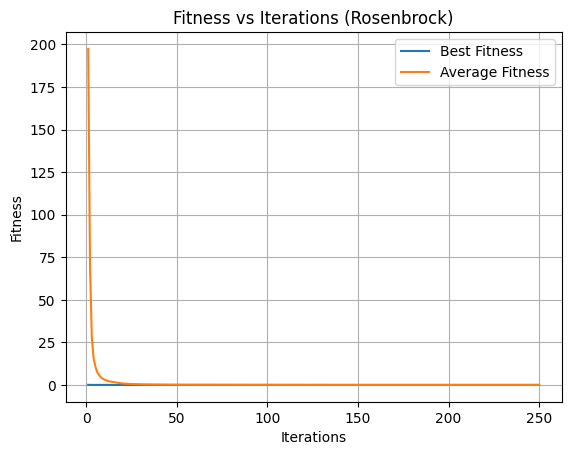

In [13]:
bests_fitness = [b[2] for b in bests]
iterations = list(range(1, len(bests_fitness) + 1))
plt.plot(iterations, bests_fitness, label='Best Fitness')
plt.plot(iterations, averages, label='Average Fitness')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title(f'Fitness vs Iterations ({"Rosenbrock"*(not func) + "Greiwank"*(func)})')
plt.legend()
plt.grid()
plt.show()

## Results:
For Rosenbrock, (x, y) = (1, 1) is the minima with f(x,y) = 0
For Greiwank, there are several minimas with f(x,y) = 0, some are :
(x, y) = (2.1744217553179356e-09, -1.4689605454118375e-08)
(x, y) = (8.917850510230875e-09, -5.8815555734523115e-09)
(x, y) = (-6.296560183007317e-10, -5.7935971703084705e-09)